# In this part we will learn our convlution network using the data set we created

Some imports:

In [1]:
import numpy
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from MyDataSet import NumbersDataSet
import cv2
import numpy as np
from network import ConvNet


Some configurations:

In [2]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001


Transformations, and some more configurations:

In [3]:
# Define the bernoulli distirubtion
bernoulli = torch.distributions.bernoulli.Bernoulli(torch.tensor([0.2]))

# Some transforms: Rotation and Adding noise
transformOpt = transforms.Compose([
    transforms.RandomRotation(degrees=(25, -25), fill=(255,)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x + bernoulli.sample(x[0].shape).reshape(x.shape[1], x.shape[2]).unsqueeze(0) * -torch.rand(x.shape))    
])

# The dataset
train_dataset = NumbersDataSet('./new_data/', transform=transformOpt)


# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


# Initialize our network
model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)

The learning part:

In [4]:
plot_training = []

for epoch in range(num_epochs):
    loss_training = 0.0
    epoch_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_item = loss.item()
        loss_training += loss_item
        epoch_loss += loss_item

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss_training / 100))
            loss_training = 0.0

    plot_training.append(epoch_loss / i)
    
# Save the model checkpoint
torch.save(model.state_dict(), 'model_final.ckpt')

print("Done!")

Epoch [1/5], Step [100/400], Loss: 0.4595
Epoch [1/5], Step [200/400], Loss: 0.0328
Epoch [1/5], Step [300/400], Loss: 0.0140
Epoch [1/5], Step [400/400], Loss: 0.0078
Epoch [2/5], Step [100/400], Loss: 0.0048
Epoch [2/5], Step [200/400], Loss: 0.0034
Epoch [2/5], Step [300/400], Loss: 0.0024
Epoch [2/5], Step [400/400], Loss: 0.0020
Epoch [3/5], Step [100/400], Loss: 0.0015
Epoch [3/5], Step [200/400], Loss: 0.0013
Epoch [3/5], Step [300/400], Loss: 0.0010
Epoch [3/5], Step [400/400], Loss: 0.0008
Epoch [4/5], Step [100/400], Loss: 0.0008
Epoch [4/5], Step [200/400], Loss: 0.0007
Epoch [4/5], Step [300/400], Loss: 0.0006
Epoch [4/5], Step [400/400], Loss: 0.0005
Epoch [5/5], Step [100/400], Loss: 0.0005
Epoch [5/5], Step [200/400], Loss: 0.0005
Epoch [5/5], Step [300/400], Loss: 0.0004
Epoch [5/5], Step [400/400], Loss: 0.0006
Done!



Plotting the loss training curve:

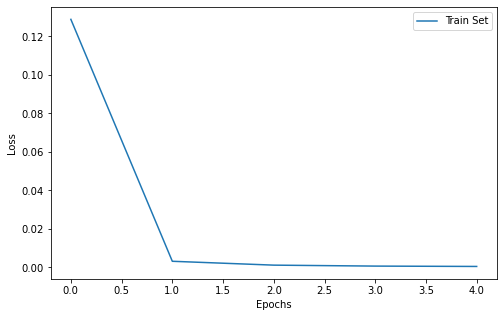

In [13]:
plt.figure(figsize = (8, 5))
plt.plot(plot_training)
plt.legend(['Train Set'], loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()